# Dataset
We will create our own dataset here that we can then use to train our fine tuned model.

1. Import the base dataset from HuggingFace.

In [53]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("shortbread/tickers", split="train")

# Select only the required columns and rename 'long_business_summary' to 'idea'
dataset = dataset.remove_columns([col for col in dataset.column_names if col not in ['symbol', 'name', 'close', 'volume', 'market_cap', 'long_business_summary']])
dataset = dataset.rename_column("long_business_summary", "idea")

# Display a few rows of the filtered and renamed dataset
print(dataset)


Dataset({
    features: ['symbol', 'name', 'close', 'volume', 'market_cap', 'idea'],
    num_rows: 7314
})


In [54]:
import pandas as pd
from pandas import DataFrame
import yfinance as yf
import time
import os

# Ensure the "Data" folder exists
os.makedirs("Data", exist_ok=True)

df = dataset.to_pandas()

# Parameters for date range and batch size
start_date = "2020-01-01"
end_date = "2023-01-01"
batch_size = 50  # Adjust batch size based on rate limits

# Limit dataset for testing
# df = df[-50:]

# Initialize an empty list to store all data in the desired format
all_data = DataFrame(columns=['Ticker', 'Idea', 'StockPrice', 'StockPriceDevelopment',
                              'MarketCap', 'Volume', 'Historical'])

# Fetch data in batches
index = 0
for i in range(0, len(df), batch_size):
    batch = df.iloc[i:i + batch_size]
    intermediate_index = 0
    for _, row in batch.iterrows():
        index = i * batch_size + intermediate_index
        intermediate_index += 1
        
        symbol = row['symbol']  # Access the ticker symbol
        if not symbol:
            continue

        try:
            # Fetch historical stock data at a monthly interval
            stock = yf.Ticker(symbol)
            periods = ["1y", "6mo", "1mo"]  # Periods to try
            hist = None

            # Try different periods to fetch data
            for period in periods:
                hist = stock.history(period=period, interval="1mo")
                if not hist.empty:
                    break  # Exit loop if data is found

            if hist.empty:  # If no data found after all retries
                print(f"No data found for {symbol} after retries. Skipping.")
                continue

            # Get the last 12 months of monthly closing prices
            last_12_months_prices = hist['Close'].dropna().tail(12).tolist()

            # Calculate stock price development as the percentage change over time
            stock_price_development = ((hist['Close'].iloc[-1] - hist['Close'].iloc[0]) / hist['Close'].iloc[0]) * 100

            # Prepare the entry
            entry = [
                row['symbol'],  # Ticker
                row['idea'] or stock.info.get("longBusinessSummary", None),
                hist['Close'].iloc[-1] if not hist['Close'].isna().any() else row['close'],
                stock_price_development,
                row['market_cap'],
                row['volume'],
                last_12_months_prices,  # Add historical column with actual prices
            ]

            if any(pd.isna(value) for value in entry[:-1]):  # Exclude the historical array from NaN check
                print(f"Skipping {symbol} due to NaN values.")
                continue

            # Append this company's enriched data to all_data list or DataFrame
            all_data.loc[index] = entry

            # Delay to avoid hitting rate limits
            time.sleep(0.1)

        except Exception as e:
            print(f"Failed to fetch data for {symbol}: {e}")
            time.sleep(0.1)

    # Delay between batches to avoid rate limiting
    time.sleep(2)

all_data.to_csv('Data/entire_company_stock_prices.csv', index=False)

print("Data collection complete. Final CSV file saved in 'Data/entire_company_stock_prices.csv'")


$AAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AAC after retries. Skipping.


$AACI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AACI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AACI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AACI after retries. Skipping.


$AAIC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AAIC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AAIC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AAIC after retries. Skipping.


$AAMC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AAMC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AAMC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AAMC after retries. Skipping.


$AAN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AAN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AAN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AAN after retries. Skipping.


$AAU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AAU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AAU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AAU after retries. Skipping.


$ABC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ABC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ABC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ABC after retries. Skipping.


$ABCM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ABCM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ABCM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ABCM after retries. Skipping.


$ABIO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ABIO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ABIO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ABIO after retries. Skipping.


$ABST: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ABST: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ABST: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ABST after retries. Skipping.


$ACAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACAC after retries. Skipping.


$ACAH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACAH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACAH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACAH after retries. Skipping.


$ACAQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACAQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACAQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACAQ after retries. Skipping.


$ACAX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACAX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACAX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACAX after retries. Skipping.


$ACBA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACBA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACBA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACBA after retries. Skipping.


$ACER: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACER: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACER: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACER after retries. Skipping.


$ACGN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACGN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACGN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACGN after retries. Skipping.


$ACOR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACOR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACOR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACOR after retries. Skipping.


$ACRO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACRO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACRO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACRO after retries. Skipping.


$ACRX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACRX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACRX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACRX after retries. Skipping.


$ACST: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ACST: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ACST: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ACST after retries. Skipping.


$ADER: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ADER: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ADER: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ADER after retries. Skipping.


$ADES: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ADES: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ADES: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ADES after retries. Skipping.


$ADEX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ADEX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ADEX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ADEX after retries. Skipping.


$ADMP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ADMP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ADMP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ADMP after retries. Skipping.


$ADOC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ADOC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ADOC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ADOC after retries. Skipping.


$ADRT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ADRT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ADRT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ADRT after retries. Skipping.


$ADTH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ADTH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ADTH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ADTH after retries. Skipping.


$AEL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AEL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AEL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AEL after retries. Skipping.


$AENZ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AENZ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AENZ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AENZ after retries. Skipping.


$AEY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AEY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AEY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AEY after retries. Skipping.


$AEZS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AEZS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AEZS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AEZS after retries. Skipping.


$AFT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AFT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AFT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AFT after retries. Skipping.


$AFTR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AFTR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AFTR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AFTR after retries. Skipping.


$AGAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AGAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AGAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AGAC after retries. Skipping.


$AGBA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AGBA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AGBA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AGBA after retries. Skipping.
Skipping AGD due to NaN values.


$AGE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AGE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AGE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AGE after retries. Skipping.


$AGIL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AGIL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AGIL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AGIL after retries. Skipping.


$AGLE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AGLE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AGLE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AGLE after retries. Skipping.


$AGRX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AGRX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AGRX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AGRX after retries. Skipping.


$AGTI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AGTI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AGTI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AGTI after retries. Skipping.


$AIF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AIF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AIF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AIF after retries. Skipping.


$AIH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AIH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AIH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AIH after retries. Skipping.


$AINC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AINC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AINC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AINC after retries. Skipping.
Skipping AIO due to NaN values.


$AIRC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AIRC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AIRC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AIRC after retries. Skipping.


$AIU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AIU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AIU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AIU after retries. Skipping.


$AKLI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AKLI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AKLI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AKLI after retries. Skipping.


$AKU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AKU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AKU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AKU after retries. Skipping.


$ALCC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ALCC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ALCC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ALCC after retries. Skipping.


$ALIM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ALIM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ALIM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ALIM after retries. Skipping.


$ALLG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ALLG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ALLG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ALLG after retries. Skipping.


$ALOR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ALOR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ALOR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ALOR after retries. Skipping.


$ALPA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ALPA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ALPA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ALPA after retries. Skipping.


$ALPN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ALPN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ALPN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ALPN after retries. Skipping.


ALPS: Period '1y' is invalid, must be one of ['1d', '5d']
ALPS: Period '6mo' is invalid, must be one of ['1d', '5d']
ALPS: Period '1mo' is invalid, must be one of ['1d', '5d']


No data found for ALPS after retries. Skipping.


$ALTU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ALTU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ALTU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ALTU after retries. Skipping.


$ALYA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ALYA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ALYA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ALYA after retries. Skipping.


$AMAM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AMAM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMAM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AMAM after retries. Skipping.


$AMAO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AMAO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMAO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AMAO after retries. Skipping.


$AMEH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AMEH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMEH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AMEH after retries. Skipping.


$AMK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AMK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AMK after retries. Skipping.


$AMNB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AMNB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMNB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AMNB after retries. Skipping.


$AMOT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AMOT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMOT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AMOT after retries. Skipping.


AMRS: Period '1y' is invalid, must be one of ['1d', '5d']
AMRS: Period '6mo' is invalid, must be one of ['1d', '5d']
AMRS: Period '1mo' is invalid, must be one of ['1d', '5d']


No data found for AMRS after retries. Skipping.


$AMSWA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AMSWA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMSWA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AMSWA after retries. Skipping.


$AMTI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AMTI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMTI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AMTI after retries. Skipping.


$ANZU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ANZU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ANZU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ANZU after retries. Skipping.


AONC: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']
$APAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APAC after retries. Skipping.


$APCA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APCA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APCA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APCA after retries. Skipping.


$APE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APE after retries. Skipping.


$APGB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APGB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APGB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APGB after retries. Skipping.


$APGN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APGN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APGN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APGN after retries. Skipping.
Skipping APLMW due to NaN values.


$APMI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APMI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APMI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APMI after retries. Skipping.


$APPH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APPH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APPH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APPH after retries. Skipping.


$APRN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APRN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APRN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APRN after retries. Skipping.


$APTM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$APTM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$APTM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for APTM after retries. Skipping.


$ARAV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARAV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARAV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARAV after retries. Skipping.


$ARBG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARBG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARBG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARBG after retries. Skipping.


$ARCE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARCE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARCE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARCE after retries. Skipping.


$ARGO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARGO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARGO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARGO after retries. Skipping.


$ARIZ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARIZ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARIZ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARIZ after retries. Skipping.


$ARNC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARNC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARNC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARNC after retries. Skipping.


ARRW: Period '1y' is invalid, must be one of ['1d', '5d']
ARRW: Period '6mo' is invalid, must be one of ['1d', '5d']
ARRW: Period '1mo' is invalid, must be one of ['1d', '5d']


No data found for ARRW after retries. Skipping.


$ARTE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARTE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARTE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARTE after retries. Skipping.


$ARVL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARVL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARVL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARVL after retries. Skipping.


$ARYD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARYD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARYD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARYD after retries. Skipping.


$ARYE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ARYE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ARYE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ARYE after retries. Skipping.


$ASCA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ASCA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ASCA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ASCA after retries. Skipping.
Skipping ASGI due to NaN values.


$ASLN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ASLN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ASLN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ASLN after retries. Skipping.


$ASPA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ASPA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ASPA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ASPA after retries. Skipping.


$ASTR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ASTR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ASTR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ASTR after retries. Skipping.


$ASXC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ASXC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ASXC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ASXC after retries. Skipping.


$ATAK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ATAK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ATAK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ATAK after retries. Skipping.


$ATAQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ATAQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ATAQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ATAQ after retries. Skipping.


$ATHX: possibly delisted; no price data found  (period=1y)
$ATHX: possibly delisted; no price data found  (period=6mo)
$ATHX: possibly delisted; no price data found  (period=1mo)


No data found for ATHX after retries. Skipping.


$ATRI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ATRI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ATRI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ATRI after retries. Skipping.


$ATTO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ATTO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ATTO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ATTO after retries. Skipping.


$ATVI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ATVI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ATVI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ATVI after retries. Skipping.


$AUGX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AUGX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AUGX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AUGX after retries. Skipping.


$AULT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AULT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AULT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AULT after retries. Skipping.


$AURC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AURC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AURC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AURC after retries. Skipping.


$AUVI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AUVI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AUVI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AUVI after retries. Skipping.


$AVHI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AVHI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AVHI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AVHI after retries. Skipping.


$AVID: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AVID: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AVID: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AVID after retries. Skipping.


$AVRO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AVRO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AVRO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AVRO after retries. Skipping.


AVTA: Period '1y' is invalid, must be one of ['1d', '5d']
AVTA: Period '6mo' is invalid, must be one of ['1d', '5d']
AVTA: Period '1mo' is invalid, must be one of ['1d', '5d']


No data found for AVTA after retries. Skipping.


$AXLA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AXLA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AXLA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AXLA after retries. Skipping.


$AYX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AYX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AYX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AYX after retries. Skipping.


$AZYO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$AZYO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AZYO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for AZYO after retries. Skipping.


$BACA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BACA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BACA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BACA after retries. Skipping.
Skipping BCAT due to NaN values.


$BCEL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BCEL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BCEL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BCEL after retries. Skipping.


BETS: Period '1y' is invalid, must be one of ['1d', '5d']
BETS: Period '6mo' is invalid, must be one of ['1d', '5d']
BETS: Period '1mo' is invalid, must be one of ['1d', '5d']


No data found for BETS after retries. Skipping.


$BGRY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BGRY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BGRY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BGRY after retries. Skipping.
Skipping BHFAL due to NaN values.


$BHG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BHG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BHG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BHG after retries. Skipping.


$BIG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BIG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BIG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BIG after retries. Skipping.


$BIOC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BIOC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BIOC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BIOC after retries. Skipping.


$BIOL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BIOL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BIOL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BIOL after retries. Skipping.


$BIOS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BIOS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BIOS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BIOS after retries. Skipping.


$BITE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BITE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BITE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BITE after retries. Skipping.


$BKCC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BKCC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BKCC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BKCC after retries. Skipping.


$BKI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BKI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BKI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BKI after retries. Skipping.


$BLNG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BLNG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BLNG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BLNG after retries. Skipping.


$BLUA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BLUA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BLUA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BLUA after retries. Skipping.


$BMAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BMAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BMAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BMAC after retries. Skipping.
Skipping BMEZ due to NaN values.


$BNMV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BNMV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BNMV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BNMV after retries. Skipping.


$BNRE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BNRE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BNRE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BNRE after retries. Skipping.


$BOAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BOAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BOAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BOAC after retries. Skipping.


$BODY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BODY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BODY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BODY after retries. Skipping.


$BPTS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BPTS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BPTS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BPTS after retries. Skipping.


$BRD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BRD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BRD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BRD after retries. Skipping.


$BRDS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BRDS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BRDS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BRDS after retries. Skipping.


$BREZ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BREZ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BREZ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BREZ after retries. Skipping.


$BRLI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BRLI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BRLI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BRLI after retries. Skipping.


$BRP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BRP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BRP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BRP after retries. Skipping.


$BRQS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BRQS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BRQS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BRQS after retries. Skipping.


$BRSH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BRSH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BRSH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BRSH after retries. Skipping.


$BSAQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BSAQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BSAQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BSAQ after retries. Skipping.


$BSQR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BSQR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BSQR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BSQR after retries. Skipping.


$BTB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BTB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BTB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BTB after retries. Skipping.


$BTWN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BTWN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BTWN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BTWN after retries. Skipping.


$BVH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BVH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BVH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BVH after retries. Skipping.


$BVXV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BVXV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BVXV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BVXV after retries. Skipping.


$BWAC: possibly delisted; no price data found  (period=1y)
$BWAC: possibly delisted; no price data found  (period=6mo)
$BWAC: possibly delisted; no price data found  (period=1mo)


No data found for BWAC after retries. Skipping.


$BWAQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BWAQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BWAQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BWAQ after retries. Skipping.


$BWC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BWC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BWC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BWC after retries. Skipping.


$BWV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BWV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BWV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BWV after retries. Skipping.


$BXRX: possibly delisted; no price data found  (period=1y)
$BXRX: possibly delisted; no price data found  (period=6mo)
$BXRX: possibly delisted; no price data found  (period=1mo)


No data found for BXRX after retries. Skipping.


$BYN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BYN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BYN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BYN after retries. Skipping.


$BYTS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BYTS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$BYTS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for BYTS after retries. Skipping.


$CACO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CACO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CACO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CACO after retries. Skipping.


$CALB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CALB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CALB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CALB after retries. Skipping.


$CALT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CALT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CALT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CALT after retries. Skipping.


CAMP: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
CAMP: Period '6mo' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
$CANO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CANO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CANO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CANO after retries. Skipping.


$CASA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CASA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CASA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CASA after retries. Skipping.
Skipping CATC due to NaN values.


$CBAY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CBAY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CBAY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CBAY after retries. Skipping.


$CBD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CBD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CBD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CBD after retries. Skipping.


$CBH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CBH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CBH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CBH after retries. Skipping.


$CBIO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CBIO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CBIO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CBIO after retries. Skipping.


$CCAI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CCAI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CCAI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CCAI after retries. Skipping.


$CCF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CCF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CCF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CCF after retries. Skipping.


$CCLP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CCLP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CCLP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CCLP after retries. Skipping.


$CCV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CCV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CCV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CCV after retries. Skipping.


$CCVI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CCVI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CCVI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CCVI after retries. Skipping.
Skipping CCZ due to NaN values.


$CD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CD after retries. Skipping.


$CDAQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CDAQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CDAQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CDAQ after retries. Skipping.


$CDAY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CDAY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CDAY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CDAY after retries. Skipping.


$CEI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CEI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CEI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CEI after retries. Skipping.


$CELL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CELL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CELL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CELL after retries. Skipping.


$CEM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CEM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CEM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CEM after retries. Skipping.


$CEN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CEN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CEN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CEN after retries. Skipping.


$CEQP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CEQP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CEQP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CEQP after retries. Skipping.


$CERE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CERE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CERE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CERE after retries. Skipping.


$CETU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CETU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CETU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CETU after retries. Skipping.


$CFFE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CFFE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CFFE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CFFE after retries. Skipping.


$CFIV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CFIV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CFIV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CFIV after retries. Skipping.


$CFMS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CFMS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CFMS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CFMS after retries. Skipping.


$CFRX: possibly delisted; no price data found  (period=1y)
$CFRX: possibly delisted; no price data found  (period=6mo)
$CFRX: possibly delisted; no price data found  (period=1mo)


No data found for CFRX after retries. Skipping.


$CGRN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CGRN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CGRN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CGRN after retries. Skipping.


$CHAA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CHAA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CHAA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CHAA after retries. Skipping.


$CHEA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CHEA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CHEA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CHEA after retries. Skipping.


$CHK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CHK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CHK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CHK after retries. Skipping.


$CHS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CHS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CHS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CHS after retries. Skipping.


$CHUY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CHUY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CHUY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CHUY after retries. Skipping.


$CIR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CIR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CIR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CIR after retries. Skipping.


$CLAY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CLAY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CLAY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CLAY after retries. Skipping.
Skipping CLBR due to NaN values.


$CLIN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CLIN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CLIN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CLIN after retries. Skipping.


$CNDB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CNDB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CNDB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CNDB after retries. Skipping.


$CNHI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CNHI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CNHI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CNHI after retries. Skipping.


$CNXA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CNXA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CNXA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CNXA after retries. Skipping.


$CONN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CONN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CONN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CONN after retries. Skipping.


$CONX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CONX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CONX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CONX after retries. Skipping.


$COOL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$COOL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$COOL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for COOL after retries. Skipping.


$CORR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CORR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CORR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CORR after retries. Skipping.


$CPAA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CPAA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CPAA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CPAA after retries. Skipping.


$CPE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CPE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CPE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CPE after retries. Skipping.


$CPG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CPG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CPG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CPG after retries. Skipping.


$CPLP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CPLP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CPLP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CPLP after retries. Skipping.


$CPSI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CPSI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CPSI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CPSI after retries. Skipping.


$CPTK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CPTK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CPTK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CPTK after retries. Skipping.


$CPUH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CPUH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CPUH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CPUH after retries. Skipping.
Skipping CPZ due to NaN values.


$CRGE: possibly delisted; no price data found  (period=1y)
$CRGE: possibly delisted; no price data found  (period=6mo)
$CRGE: possibly delisted; no price data found  (period=1mo)


No data found for CRGE after retries. Skipping.


$CSTA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CSTA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CSTA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CSTA after retries. Skipping.


$CSTR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CSTR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CSTR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CSTR after retries. Skipping.


$CTG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CTG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CTG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CTG after retries. Skipping.


$CTIB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CTIB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CTIB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CTIB after retries. Skipping.


$CTR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CTR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CTR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CTR after retries. Skipping.


$CURO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CURO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CURO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CURO after retries. Skipping.


$CVCY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CVCY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CVCY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CVCY after retries. Skipping.


$CVII: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CVII: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CVII: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CVII after retries. Skipping.


$CVLY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CVLY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CVLY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CVLY after retries. Skipping.


$CXAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CXAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CXAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CXAC after retries. Skipping.


$CYB: possibly delisted; no price data found  (period=1y)
$CYB: possibly delisted; no price data found  (period=6mo)
$CYB: possibly delisted; no price data found  (period=1mo)


No data found for CYB after retries. Skipping.


$CYT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CYT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CYT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CYT after retries. Skipping.


$CZOO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$CZOO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$CZOO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for CZOO after retries. Skipping.


$DALS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DALS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DALS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DALS after retries. Skipping.


$DBTX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DBTX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DBTX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DBTX after retries. Skipping.
Skipping DCF due to NaN values.


$DCPH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DCPH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DCPH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DCPH after retries. Skipping.


$DEN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DEN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DEN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DEN after retries. Skipping.


$DFFN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DFFN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DFFN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DFFN after retries. Skipping.


$DHAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DHAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DHAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DHAC after retries. Skipping.


$DHCA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DHCA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DHCA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DHCA after retries. Skipping.


$DICE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DICE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DICE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DICE after retries. Skipping.


$DISA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DISA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DISA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DISA after retries. Skipping.


$DISH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DISH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DISH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DISH after retries. Skipping.


$DKDCA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DKDCA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DKDCA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DKDCA after retries. Skipping.


$DLA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DLA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DLA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DLA after retries. Skipping.
Skipping DLY due to NaN values.


$DMAQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DMAQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DMAQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DMAQ after retries. Skipping.


$DMK: possibly delisted; no price data found  (period=1y)
$DMK: possibly delisted; no price data found  (period=6mo)
$DMK: possibly delisted; no price data found  (period=1mo)


No data found for DMK after retries. Skipping.


$DMS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DMS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DMS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DMS after retries. Skipping.


$DMTK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DMTK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DMTK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DMTK after retries. Skipping.


$DO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DO after retries. Skipping.


$DOMA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DOMA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DOMA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DOMA after retries. Skipping.


$DOOR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DOOR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DOOR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DOOR after retries. Skipping.


$DPSI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DPSI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DPSI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DPSI after retries. Skipping.


$DRQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DRQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DRQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DRQ after retries. Skipping.


$DRTT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DRTT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DRTT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DRTT after retries. Skipping.


$DSKE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DSKE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DSKE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DSKE after retries. Skipping.


$DTOC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DTOC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DTOC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DTOC after retries. Skipping.


$DUNE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DUNE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DUNE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DUNE after retries. Skipping.


$DWAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DWAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DWAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DWAC after retries. Skipping.


$DXF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$DXF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$DXF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for DXF after retries. Skipping.


$EAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EAC after retries. Skipping.


$EAR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EAR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EAR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EAR after retries. Skipping.


$EBIX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EBIX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EBIX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EBIX after retries. Skipping.
Skipping ECAT due to NaN values.


$EDI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EDI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EDI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EDI after retries. Skipping.


$EDTX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EDTX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EDTX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EDTX after retries. Skipping.


$EDTXU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EDTXU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EDTXU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EDTXU after retries. Skipping.


$EFHT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EFHT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EFHT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EFHT after retries. Skipping.


$EGGF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EGGF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EGGF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EGGF after retries. Skipping.


$EGIO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EGIO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EGIO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EGIO after retries. Skipping.


$EGLE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EGLE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EGLE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EGLE after retries. Skipping.


$EGLX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EGLX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EGLX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EGLX after retries. Skipping.


$ELIQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ELIQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ELIQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ELIQ after retries. Skipping.


$ELYM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ELYM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ELYM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ELYM after retries. Skipping.


$EMAN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EMAN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EMAN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EMAN after retries. Skipping.


$EMBK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EMBK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EMBK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EMBK after retries. Skipping.


$EMLD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EMLD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EMLD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EMLD after retries. Skipping.


$ENCP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ENCP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ENCP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ENCP after retries. Skipping.


$ENER: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ENER: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ENER: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ENER after retries. Skipping.


$ENTF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ENTF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ENTF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ENTF after retries. Skipping.


$EQRX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EQRX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EQRX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EQRX after retries. Skipping.


$ERF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ERF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ERF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ERF after retries. Skipping.


$ESAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ESAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ESAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ESAC after retries. Skipping.


$ESMT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ESMT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ESMT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ESMT after retries. Skipping.


$ESTE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ESTE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ESTE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ESTE after retries. Skipping.


$ETAO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ETAO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ETAO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ETAO after retries. Skipping.


$ETRN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ETRN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ETRN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ETRN after retries. Skipping.


$EURN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EURN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EURN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EURN after retries. Skipping.


$EVBG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EVBG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EVBG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EVBG after retries. Skipping.


$EWGS: possibly delisted; no price data found  (period=1y)
$EWGS: possibly delisted; no price data found  (period=6mo)
$EWGS: possibly delisted; no price data found  (period=1mo)


No data found for EWGS after retries. Skipping.


$EXPR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EXPR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$EXPR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for EXPR after retries. Skipping.


FACT: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', 'ytd', 'max']
FACT: Period '6mo' is invalid, must be one of ['1d', '5d', '1mo', 'ytd', 'max']


Skipping FACT due to NaN values.


$FAM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FAM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FAM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FAM after retries. Skipping.


$FANH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FANH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FANH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FANH after retries. Skipping.


$FATH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FATH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FATH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FATH after retries. Skipping.


$FATP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FATP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FATP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FATP after retries. Skipping.


$FAZE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FAZE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FAZE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FAZE after retries. Skipping.


$FEN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FEN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FEN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FEN after retries. Skipping.


$FEXD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FEXD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FEXD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FEXD after retries. Skipping.


$FGH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FGH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FGH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FGH after retries. Skipping.


$FGMC: possibly delisted; no price data found  (period=1y)
$FGMC: possibly delisted; no price data found  (period=6mo)
$FGMC: possibly delisted; no price data found  (period=1mo)


No data found for FGMC after retries. Skipping.


$FIAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FIAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FIAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FIAC after retries. Skipping.


$FICV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FICV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FICV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FICV after retries. Skipping.


$FIF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FIF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FIF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FIF after retries. Skipping.
Skipping FINS due to NaN values.


$FIXX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FIXX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FIXX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FIXX after retries. Skipping.


$FLAG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FLAG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FLAG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FLAG after retries. Skipping.


$FLFV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FLFV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FLFV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FLFV after retries. Skipping.


$FLJ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FLJ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FLJ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FLJ after retries. Skipping.


$FLME: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FLME: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FLME: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FLME after retries. Skipping.


$FLT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FLT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FLT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FLT after retries. Skipping.


$FNCB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FNCB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FNCB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FNCB after retries. Skipping.


$FOCS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FOCS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FOCS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FOCS after retries. Skipping.


$FORG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FORG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FORG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FORG after retries. Skipping.


$FPL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FPL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FPL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FPL after retries. Skipping.


$FRBK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FRBK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FRBK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FRBK after retries. Skipping.


$FRBN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FRBN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FRBN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FRBN after retries. Skipping.


$FREE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FREE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FREE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FREE after retries. Skipping.


$FREQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FREQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FREQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FREQ after retries. Skipping.


$FRG: possibly delisted; no price data found  (period=1y)
$FRG: possibly delisted; no price data found  (period=6mo)
$FRG: possibly delisted; no price data found  (period=1mo)


No data found for FRG after retries. Skipping.


$FRGI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FRGI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FRGI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FRGI after retries. Skipping.


$FRLN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FRLN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FRLN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FRLN after retries. Skipping.


$FRXB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FRXB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FRXB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FRXB after retries. Skipping.


$FSD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FSD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FSD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FSD after retries. Skipping.


$FSNB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FSNB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FSNB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FSNB after retries. Skipping.


$FSR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FSR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FSR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FSR after retries. Skipping.


$FTCH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FTCH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FTCH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FTCH after retries. Skipping.
Skipping FTHY due to NaN values.


$FUSN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FUSN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FUSN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FUSN after retries. Skipping.


$FWAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FWAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FWAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FWAC after retries. Skipping.


$FWBI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FWBI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FWBI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FWBI after retries. Skipping.
Skipping FXE due to NaN values.


$FZT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$FZT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$FZT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for FZT after retries. Skipping.


$GAMC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GAMC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GAMC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GAMC after retries. Skipping.


$GBNH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GBNH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GBNH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GBNH after retries. Skipping.


$GDNR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GDNR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GDNR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GDNR after retries. Skipping.


$GEHI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GEHI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GEHI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GEHI after retries. Skipping.


$GENQ: possibly delisted; no price data found  (period=1y)
$GENQ: possibly delisted; no price data found  (period=6mo)
$GENQ: possibly delisted; no price data found  (period=1mo)


No data found for GENQ after retries. Skipping.


$GFGD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GFGD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GFGD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GFGD after retries. Skipping.


$GFOR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GFOR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GFOR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GFOR after retries. Skipping.


$GFX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GFX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GFX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GFX after retries. Skipping.


$GGAA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GGAA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GGAA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GGAA after retries. Skipping.


$GGE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GGE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GGE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GGE after retries. Skipping.


$GHL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GHL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GHL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GHL after retries. Skipping.


$GIA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GIA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GIA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GIA after retries. Skipping.


$GIM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GIM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GIM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GIM after retries. Skipping.


$GLG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GLG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GLG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GLG after retries. Skipping.


$GLOP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GLOP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GLOP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GLOP after retries. Skipping.


$GMVD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GMVD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GMVD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GMVD after retries. Skipping.


$GOL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GOL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GOL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GOL after retries. Skipping.
Skipping GOODO due to NaN values.


$GPAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GPAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GPAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GPAC after retries. Skipping.


$GPP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GPP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GPP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GPP after retries. Skipping.


$GPS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GPS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GPS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GPS after retries. Skipping.


$GRCL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GRCL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GRCL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GRCL after retries. Skipping.


$GRIL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GRIL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GRIL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GRIL after retries. Skipping.


$GRIN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GRIN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GRIN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GRIN after retries. Skipping.


$GRNA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GRNA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GRNA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GRNA after retries. Skipping.


$GRPH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GRPH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GRPH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GRPH after retries. Skipping.


$GRTS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GRTS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GRTS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GRTS after retries. Skipping.


$GSD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GSD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GSD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GSD after retries. Skipping.


$GSMG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GSMG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GSMG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GSMG after retries. Skipping.


$GTAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GTAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GTAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GTAC after retries. Skipping.


$GTH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GTH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GTH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GTH after retries. Skipping.


$GTHX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GTHX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GTHX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GTHX after retries. Skipping.
Skipping GUG due to NaN values.


$GVP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$GVP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$GVP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for GVP after retries. Skipping.


$HA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HA after retries. Skipping.


$HARP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HARP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HARP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HARP after retries. Skipping.


$HCCI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HCCI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HCCI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HCCI after retries. Skipping.


$HCDI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HCDI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HCDI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HCDI after retries. Skipping.


$HCMA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HCMA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HCMA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HCMA after retries. Skipping.
Skipping HCXY due to NaN values.


$HEP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HEP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HEP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HEP after retries. Skipping.


$HEWC: possibly delisted; no price data found  (period=1y)
$HEWC: possibly delisted; no price data found  (period=6mo)
$HEWC: possibly delisted; no price data found  (period=1mo)


No data found for HEWC after retries. Skipping.


$HEWU: possibly delisted; no price data found  (period=1y)
$HEWU: possibly delisted; no price data found  (period=6mo)
$HEWU: possibly delisted; no price data found  (period=1mo)


No data found for HEWU after retries. Skipping.


$HGEN: possibly delisted; no price data found  (period=1y)
$HGEN: possibly delisted; no price data found  (period=6mo)
$HGEN: possibly delisted; no price data found  (period=1mo)


No data found for HGEN after retries. Skipping.
Skipping HGLB due to NaN values.


$HHC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HHC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HHC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HHC after retries. Skipping.


$HHLA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HHLA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HHLA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HHLA after retries. Skipping.


$HHRS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HHRS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HHRS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HHRS after retries. Skipping.


$HIBB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HIBB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HIBB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HIBB after retries. Skipping.


$HILS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HILS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HILS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HILS after retries. Skipping.


$HLTH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HLTH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HLTH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HLTH after retries. Skipping.


$HMA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HMA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HMA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HMA after retries. Skipping.


$HMAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HMAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HMAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HMAC after retries. Skipping.


$HMNF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HMNF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HMNF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HMNF after retries. Skipping.


$HMPT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HMPT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HMPT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HMPT after retries. Skipping.


$HNRA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HNRA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HNRA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HNRA after retries. Skipping.


$HOLI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HOLI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HOLI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HOLI after retries. Skipping.


$HPLT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HPLT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HPLT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HPLT after retries. Skipping.


$HRT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HRT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HRT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HRT after retries. Skipping.


$HT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HT after retries. Skipping.


$HTY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HTY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HTY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HTY after retries. Skipping.


$HUGE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HUGE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HUGE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HUGE after retries. Skipping.


$HWEL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HWEL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HWEL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HWEL after retries. Skipping.


$HYW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$HYW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$HYW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for HYW after retries. Skipping.


$HZNP: possibly delisted; no price data found  (period=1y)
$HZNP: possibly delisted; no price data found  (period=6mo)
$HZNP: possibly delisted; no price data found  (period=1mo)


No data found for HZNP after retries. Skipping.


$ICD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ICD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ICD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ICD after retries. Skipping.


$ICNC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ICNC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ICNC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ICNC after retries. Skipping.


$ICPT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ICPT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ICPT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ICPT after retries. Skipping.


$ICVX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ICVX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ICVX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ICVX after retries. Skipping.


$ID: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ID: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ID: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ID after retries. Skipping.


$IDBA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$IDBA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$IDBA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for IDBA after retries. Skipping.


$IFIN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$IFIN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$IFIN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for IFIN after retries. Skipping.


$IHIT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$IHIT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$IHIT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for IHIT after retries. Skipping.
Skipping IHTA due to NaN values.


$ILLM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ILLM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ILLM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ILLM after retries. Skipping.


$IMGN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$IMGN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$IMGN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for IMGN after retries. Skipping.


$IMPL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$IMPL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$IMPL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for IMPL after retries. Skipping.


$INFI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$INFI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$INFI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for INFI after retries. Skipping.


$INPX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$INPX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$INPX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for INPX after retries. Skipping.


$INVO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$INVO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$INVO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for INVO after retries. Skipping.


$IOAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$IOAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$IOAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for IOAC after retries. Skipping.


$IPVF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$IPVF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$IPVF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for IPVF after retries. Skipping.


$IRNT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$IRNT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$IRNT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for IRNT after retries. Skipping.


$ISIG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ISIG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ISIG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ISIG after retries. Skipping.


$ISUN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ISUN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ISUN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ISUN after retries. Skipping.


$ITAQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ITAQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ITAQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ITAQ after retries. Skipping.


$ITCL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ITCL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ITCL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ITCL after retries. Skipping.


$ITI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ITI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ITI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ITI after retries. Skipping.


$JAN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JAN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JAN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JAN after retries. Skipping.


$JAQC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JAQC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JAQC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JAQC after retries. Skipping.


$JCTCF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JCTCF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JCTCF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JCTCF after retries. Skipping.


$JGGC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JGGC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JGGC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JGGC after retries. Skipping.


$JHAA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JHAA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JHAA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JHAA after retries. Skipping.


$JOAN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JOAN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JOAN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JOAN after retries. Skipping.


$JPS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JPS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JPS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JPS after retries. Skipping.


$JPT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JPT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JPT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JPT after retries. Skipping.


$JRO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JRO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JRO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JRO after retries. Skipping.


$JSD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JSD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JSD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JSD after retries. Skipping.


$JT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JT after retries. Skipping.


$JUN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JUN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JUN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JUN after retries. Skipping.


$JUPW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JUPW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JUPW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JUPW after retries. Skipping.


$JWSM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$JWSM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$JWSM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for JWSM after retries. Skipping.


$KA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KA after retries. Skipping.


$KAMN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KAMN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KAMN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KAMN after retries. Skipping.


$KCGI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KCGI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KCGI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KCGI after retries. Skipping.


$KDNY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KDNY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KDNY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KDNY after retries. Skipping.


$KERN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KERN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KERN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KERN after retries. Skipping.


$KFYP: possibly delisted; no price data found  (period=1y)
$KFYP: possibly delisted; no price data found  (period=6mo)
$KFYP: possibly delisted; no price data found  (period=1mo)


No data found for KFYP after retries. Skipping.


$KIQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KIQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KIQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KIQ after retries. Skipping.


$KLR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KLR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KLR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KLR after retries. Skipping.


$KMF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KMF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KMF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KMF after retries. Skipping.


$KNSW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KNSW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KNSW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KNSW after retries. Skipping.


$KNTE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KNTE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KNTE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KNTE after retries. Skipping.


$KRNL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KRNL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KRNL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KRNL after retries. Skipping.


$KRTX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KRTX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KRTX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KRTX after retries. Skipping.


$KTRA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KTRA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KTRA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KTRA after retries. Skipping.


$KVSA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$KVSA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$KVSA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for KVSA after retries. Skipping.


$KYCH: possibly delisted; no price data found  (period=1y)
$KYCH: possibly delisted; no price data found  (period=6mo)
$KYCH: possibly delisted; no price data found  (period=1mo)


No data found for KYCH after retries. Skipping.


$LABP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LABP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LABP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LABP after retries. Skipping.


$LAZY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LAZY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LAZY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LAZY after retries. Skipping.


$LBBB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LBBB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LBBB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LBBB after retries. Skipping.


$LBC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LBC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LBC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LBC after retries. Skipping.


$LCA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LCA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LCA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LCA after retries. Skipping.


$LCAA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LCAA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LCAA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LCAA after retries. Skipping.


$LCW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LCW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LCW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LCW after retries. Skipping.
Skipping LDP due to NaN values.


$LEJU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LEJU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LEJU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LEJU after retries. Skipping.


$LFAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LFAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LFAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LFAC after retries. Skipping.


$LGST: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LGST: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LGST: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LGST after retries. Skipping.


$LGVC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LGVC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LGVC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LGVC after retries. Skipping.


$LHC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LHC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LHC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LHC after retries. Skipping.


$LIBY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LIBY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LIBY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LIBY after retries. Skipping.


$LIFE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LIFE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LIFE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LIFE after retries. Skipping.


$LIVB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LIVB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LIVB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LIVB after retries. Skipping.


$LIZI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LIZI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LIZI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LIZI after retries. Skipping.


$LL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LL after retries. Skipping.


$LLAP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LLAP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LLAP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LLAP after retries. Skipping.


$LMDX: possibly delisted; no price data found  (period=1y)
$LMDX: possibly delisted; no price data found  (period=6mo)
$LMDX: possibly delisted; no price data found  (period=1mo)


No data found for LMDX after retries. Skipping.


$LMNL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LMNL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LMNL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LMNL after retries. Skipping.


$LOCC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LOCC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LOCC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LOCC after retries. Skipping.


$LOV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LOV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LOV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LOV after retries. Skipping.


$LSDI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LSDI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LSDI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LSDI after retries. Skipping.


$LSI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LSI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LSI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LSI after retries. Skipping.


$LSXMA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LSXMA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LSXMA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LSXMA after retries. Skipping.


$LSXMB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LSXMB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LSXMB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LSXMB after retries. Skipping.


$LSXMK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LSXMK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LSXMK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LSXMK after retries. Skipping.


$LTHM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LTHM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LTHM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LTHM after retries. Skipping.


$LVOX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$LVOX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$LVOX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for LVOX after retries. Skipping.


$MACA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MACA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MACA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MACA after retries. Skipping.


$MACK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MACK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MACK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MACK after retries. Skipping.
Skipping MATX due to NaN values.


$MBAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MBAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MBAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MBAC after retries. Skipping.


$MBINP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MBINP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MBINP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MBINP after retries. Skipping.


$MBSC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MBSC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MBSC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MBSC after retries. Skipping.


$MBTC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MBTC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MBTC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MBTC after retries. Skipping.


$MCAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MCAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MCAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MCAC after retries. Skipping.


$MCAF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MCAF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MCAF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MCAF after retries. Skipping.


$MCBC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MCBC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MCBC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MCBC after retries. Skipping.


$MCLD: possibly delisted; no price data found  (period=1y)
$MCLD: possibly delisted; no price data found  (period=6mo)
$MCLD: possibly delisted; no price data found  (period=1mo)


No data found for MCLD after retries. Skipping.
Skipping MCR due to NaN values.
Skipping MCS due to NaN values.


$MDC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MDC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MDC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MDC after retries. Skipping.


$MDGS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MDGS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MDGS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MDGS after retries. Skipping.


$MDNA: possibly delisted; no price data found  (period=1y)
$MDNA: possibly delisted; no price data found  (period=6mo)
$MDNA: possibly delisted; no price data found  (period=1mo)


No data found for MDNA after retries. Skipping.


$MDVL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MDVL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MDVL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MDVL after retries. Skipping.


$MDWT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MDWT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MDWT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MDWT after retries. Skipping.


$MEDS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MEDS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MEDS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MEDS after retries. Skipping.
Skipping MEGI due to NaN values.


$METX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$METX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$METX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")
$MF: possibly delisted; no price data found  (period=1y)
$MF: possibly delisted; no price data found  (period=6mo)


No data found for METX after retries. Skipping.


$MF: possibly delisted; no price data found  (period=1mo)


No data found for MF after retries. Skipping.


$MFD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MFD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MFD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MFD after retries. Skipping.


$MFV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MFV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MFV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MFV after retries. Skipping.


$MGTA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MGTA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MGTA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MGTA after retries. Skipping.
Skipping MHLA due to NaN values.


$MICS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MICS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MICS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MICS after retries. Skipping.


$MIMO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MIMO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MIMO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MIMO after retries. Skipping.


$MINDP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MINDP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MINDP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MINDP after retries. Skipping.
Skipping MIO due to NaN values.


$MIRO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MIRO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MIRO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MIRO after retries. Skipping.


$MIXT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MIXT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MIXT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MIXT after retries. Skipping.


$MKUL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MKUL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MKUL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MKUL after retries. Skipping.


$MLPO: possibly delisted; no price data found  (period=1y)
$MLPO: possibly delisted; no price data found  (period=6mo)
$MLPO: possibly delisted; no price data found  (period=1mo)


No data found for MLPO after retries. Skipping.


$MLVF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MLVF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MLVF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MLVF after retries. Skipping.


$MMAT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MMAT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MMAT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MMAT after retries. Skipping.


$MMMB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MMMB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MMMB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MMMB after retries. Skipping.


$MMP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MMP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MMP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MMP after retries. Skipping.


$MNP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MNP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MNP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MNP after retries. Skipping.


$MOBV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MOBV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MOBV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MOBV after retries. Skipping.


$MODN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MODN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MODN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MODN after retries. Skipping.


$MOR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MOR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MOR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MOR after retries. Skipping.


$MORF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MORF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MORF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MORF after retries. Skipping.


$MOXC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MOXC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MOXC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MOXC after retries. Skipping.


$MRDB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MRDB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MRDB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MRDB after retries. Skipping.


$MRTX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MRTX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MRTX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MRTX after retries. Skipping.


$MTAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MTAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MTAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MTAC after retries. Skipping.


$MTBL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MTBL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MTBL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MTBL after retries. Skipping.


$MTRY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MTRY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MTRY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MTRY after retries. Skipping.


$MURF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MURF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MURF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MURF after retries. Skipping.


$MYMD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$MYMD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$MYMD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for MYMD after retries. Skipping.


$NATI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NATI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NATI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NATI after retries. Skipping.


$NBO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NBO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NBO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NBO after retries. Skipping.


$NBSE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NBSE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NBSE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NBSE after retries. Skipping.


$NBW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NBW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NBW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NBW after retries. Skipping.
Skipping NBXG due to NaN values.


$NCAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NCAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NCAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NCAC after retries. Skipping.


$NCR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NCR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NCR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NCR after retries. Skipping.
Skipping NDMO due to NaN values.


$NEPT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NEPT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NEPT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NEPT after retries. Skipping.


$NETC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NETC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NETC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NETC after retries. Skipping.


$NETI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NETI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NETI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NETI after retries. Skipping.


$NEWR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NEWR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NEWR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NEWR after retries. Skipping.


$NFNT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NFNT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NFNT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NFNT after retries. Skipping.


$NFTG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NFTG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NFTG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NFTG after retries. Skipping.


$NFYS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NFYS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NFYS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NFYS after retries. Skipping.


$NGM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NGM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NGM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NGM after retries. Skipping.


$NGMS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NGMS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NGMS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NGMS after retries. Skipping.


$NHWK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NHWK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NHWK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NHWK after retries. Skipping.


$NICK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NICK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NICK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NICK after retries. Skipping.


$NIR: possibly delisted; no price data found  (period=1y)
$NIR: possibly delisted; no price data found  (period=6mo)
$NIR: possibly delisted; no price data found  (period=1mo)


No data found for NIR after retries. Skipping.


$NLS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NLS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NLS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NLS after retries. Skipping.


$NLTX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NLTX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NLTX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NLTX after retries. Skipping.


$NM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NM after retries. Skipping.
Skipping NMAI due to NaN values.
Skipping NMCO due to NaN values.


$NOGN: possibly delisted; no price data found  (period=1y)
$NOGN: possibly delisted; no price data found  (period=6mo)
$NOGN: possibly delisted; no price data found  (period=1mo)


No data found for NOGN after retries. Skipping.


$NRAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NRAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NRAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NRAC after retries. Skipping.


$NRGX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NRGX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NRGX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NRGX after retries. Skipping.


$NS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NS after retries. Skipping.


$NSL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NSL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NSL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NSL after retries. Skipping.


$NSS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NSS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NSS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NSS after retries. Skipping.


$NTCO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NTCO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NTCO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NTCO after retries. Skipping.


$NUBI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NUBI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NUBI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NUBI after retries. Skipping.


$NUVA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NUVA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NUVA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NUVA after retries. Skipping.


$NUZE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NUZE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NUZE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NUZE after retries. Skipping.


$NVIV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NVIV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NVIV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NVIV after retries. Skipping.


$NVTA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NVTA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NVTA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NVTA after retries. Skipping.


$NWLI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NWLI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NWLI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NWLI after retries. Skipping.


$NXGN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NXGN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NXGN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NXGN after retries. Skipping.


$NYCB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$NYCB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$NYCB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for NYCB after retries. Skipping.


$OCN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OCN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OCN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OCN after retries. Skipping.


$OCUP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OCUP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OCUP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OCUP after retries. Skipping.


$OFC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OFC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OFC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OFC after retries. Skipping.


$OHAA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OHAA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OHAA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OHAA after retries. Skipping.


$OLIT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OLIT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OLIT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OLIT after retries. Skipping.


$OLK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OLK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OLK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OLK after retries. Skipping.


$ONTX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ONTX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ONTX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ONTX after retries. Skipping.


$ONYX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ONYX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ONYX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ONYX after retries. Skipping.


$OPA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OPA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OPA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OPA after retries. Skipping.


$ORAN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ORAN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ORAN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ORAN after retries. Skipping.


$ORTX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ORTX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ORTX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ORTX after retries. Skipping.


$OSG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OSG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OSG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OSG after retries. Skipping.


$OSTK: possibly delisted; no price data found  (period=1y)
$OSTK: possibly delisted; no price data found  (period=6mo)
$OSTK: possibly delisted; no price data found  (period=1mo)


No data found for OSTK after retries. Skipping.


$OTEC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OTEC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OTEC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OTEC after retries. Skipping.


$OTMO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OTMO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OTMO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OTMO after retries. Skipping.
Skipping OUNZ due to NaN values.


OXBRW: Period '1y' is invalid, must be one of ['1d', '5d']
OXBRW: Period '6mo' is invalid, must be one of ['1d', '5d']
OXBRW: Period '1mo' is invalid, must be one of ['1d', '5d']


No data found for OXBRW after retries. Skipping.


$OXLCM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OXLCM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OXLCM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OXLCM after retries. Skipping.


$OXUS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$OXUS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$OXUS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for OXUS after retries. Skipping.


$PACI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PACI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PACI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PACI after retries. Skipping.


$PACW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PACW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PACW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PACW after retries. Skipping.


$PATI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PATI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PATI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PATI after retries. Skipping.


$PBAX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PBAX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PBAX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PBAX after retries. Skipping.


$PBTS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PBTS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PBTS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PBTS after retries. Skipping.


$PCCT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PCCT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PCCT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PCCT after retries. Skipping.


$PCTI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PCTI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PCTI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PCTI after retries. Skipping.


$PCYG: possibly delisted; no price data found  (period=1y)
$PCYG: possibly delisted; no price data found  (period=6mo)
$PCYG: possibly delisted; no price data found  (period=1mo)


No data found for PCYG after retries. Skipping.
Skipping PDO due to NaN values.


$PEAK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PEAK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PEAK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PEAK after retries. Skipping.


$PEGR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PEGR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PEGR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PEGR after retries. Skipping.


$PEPL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PEPL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PEPL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PEPL after retries. Skipping.


$PETQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PETQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PETQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PETQ after retries. Skipping.


$PFIN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PFIN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PFIN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PFIN after retries. Skipping.


$PFSW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PFSW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PFSW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PFSW after retries. Skipping.


$PGSS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PGSS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PGSS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PGSS after retries. Skipping.


$PGTI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PGTI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PGTI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PGTI after retries. Skipping.


$PHXM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PHXM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PHXM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PHXM after retries. Skipping.
Skipping PHYS due to NaN values.


$PHYT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PHYT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PHYT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PHYT after retries. Skipping.


$PLM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PLM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PLM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PLM after retries. Skipping.


$PLMI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PLMI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PLMI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PLMI after retries. Skipping.


$PLTN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PLTN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PLTN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PLTN after retries. Skipping.


$PMGM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PMGM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PMGM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PMGM after retries. Skipping.


$PNAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PNAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PNAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PNAC after retries. Skipping.


$PNM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PNM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PNM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PNM after retries. Skipping.


$PNT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PNT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PNT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PNT after retries. Skipping.


$POL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$POL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$POL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for POL after retries. Skipping.


PORT: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']
$PPHP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PPHP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PPHP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PPHP after retries. Skipping.


$PRDS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PRDS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PRDS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PRDS after retries. Skipping.


$PRFT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PRFT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PRFT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PRFT after retries. Skipping.


$PRPC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PRPC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PRPC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PRPC after retries. Skipping.


$PRSR: possibly delisted; no price data found  (period=1y)
$PRSR: possibly delisted; no price data found  (period=6mo)
$PRSR: possibly delisted; no price data found  (period=1mo)


No data found for PRSR after retries. Skipping.
Skipping PSLV due to NaN values.


$PTHR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PTHR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PTHR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PTHR after retries. Skipping.


$PTRS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PTRS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PTRS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PTRS after retries. Skipping.


$PTWO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PTWO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PTWO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PTWO after retries. Skipping.


$PUYI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PUYI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PUYI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PUYI after retries. Skipping.


$PWFL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PWFL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PWFL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PWFL after retries. Skipping.


$PWSC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PWSC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PWSC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PWSC after retries. Skipping.


$PXD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$PXD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$PXD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for PXD after retries. Skipping.


$PYR: possibly delisted; no price data found  (period=1y)
$PYR: possibly delisted; no price data found  (period=6mo)
$PYR: possibly delisted; no price data found  (period=1mo)


No data found for PYR after retries. Skipping.


$QDRO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$QDRO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$QDRO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for QDRO after retries. Skipping.


$QFTA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$QFTA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$QFTA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for QFTA after retries. Skipping.


$QLI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$QLI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$QLI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for QLI after retries. Skipping.


$RAD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RAD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RAD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RAD after retries. Skipping.


RAIN: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', 'ytd', 'max']
RAIN: Period '6mo' is invalid, must be one of ['1d', '5d', '1mo', 'ytd', 'max']
$RBT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RBT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RBT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RBT after retries. Skipping.


$RCAC: possibly delisted; no price data found  (period=1y)
$RCAC: possibly delisted; no price data found  (period=6mo)
$RCAC: possibly delisted; no price data found  (period=1mo)


No data found for RCAC after retries. Skipping.


$RCLF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RCLF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RCLF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RCLF after retries. Skipping.


$RCRT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RCRT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RCRT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RCRT after retries. Skipping.
Skipping RFM due to NaN values.
Skipping RFMZ due to NaN values.


$RMGC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RMGC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RMGC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RMGC after retries. Skipping.
Skipping RMI due to NaN values.
Skipping RMMZ due to NaN values.


$RNLX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RNLX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RNLX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RNLX after retries. Skipping.


$ROSE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ROSE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ROSE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ROSE after retries. Skipping.


$ROSS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ROSS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ROSS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ROSS after retries. Skipping.


$ROVR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ROVR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ROVR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ROVR after retries. Skipping.


$RPHM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RPHM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RPHM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RPHM after retries. Skipping.


$RRAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RRAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RRAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RRAC after retries. Skipping.
Skipping RSF due to NaN values.
Skipping RSG due to NaN values.


$RVLP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RVLP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RVLP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RVLP after retries. Skipping.
Skipping RVYL due to NaN values.


$RWLK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RWLK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RWLK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RWLK after retries. Skipping.


$RWOD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RWOD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RWOD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RWOD after retries. Skipping.


$RYZB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$RYZB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$RYZB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for RYZB after retries. Skipping.


$SAGA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SAGA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SAGA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SAGA after retries. Skipping.


$SAI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SAI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SAI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SAI after retries. Skipping.


$SAMA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SAMA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SAMA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SAMA after retries. Skipping.


$SAMAU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SAMAU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SAMAU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SAMAU after retries. Skipping.


$SASI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SASI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SASI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SASI after retries. Skipping.


$SBOW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SBOW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SBOW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SBOW after retries. Skipping.


$SBXC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SBXC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SBXC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SBXC after retries. Skipping.


$SCAQ: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SCAQ: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SCAQ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SCAQ after retries. Skipping.


$SCPL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SCPL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SCPL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SCPL after retries. Skipping.


$SCRM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SCRM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SCRM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SCRM after retries. Skipping.


$SCTL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SCTL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SCTL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SCTL after retries. Skipping.


$SCU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SCU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SCU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SCU after retries. Skipping.


$SCX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SCX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SCX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SCX after retries. Skipping.


$SDAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SDAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SDAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SDAC after retries. Skipping.


$SDC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SDC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SDC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SDC after retries. Skipping.
Skipping SDHY due to NaN values.


$SDPI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SDPI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SDPI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SDPI after retries. Skipping.


$SEAS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SEAS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SEAS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SEAS after retries. Skipping.


$SEDA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SEDA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SEDA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SEDA after retries. Skipping.


$SELB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SELB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SELB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SELB after retries. Skipping.
Skipping SEMR due to NaN values.


$SEPA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SEPA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SEPA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SEPA after retries. Skipping.
Skipping SFBS due to NaN values.


$SFE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SFE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SFE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SFE after retries. Skipping.


$SFR: possibly delisted; no price data found  (period=1y)
$SFR: possibly delisted; no price data found  (period=6mo)
$SFR: possibly delisted; no price data found  (period=1mo)


No data found for SFR after retries. Skipping.


$SFT: possibly delisted; no price data found  (period=1y)
$SFT: possibly delisted; no price data found  (period=6mo)
$SFT: possibly delisted; no price data found  (period=1mo)


No data found for SFT after retries. Skipping.


$SGE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SGE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SGE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SGE after retries. Skipping.


$SGEN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SGEN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SGEN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SGEN after retries. Skipping.


$SGH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SGH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SGH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SGH after retries. Skipping.


$SGII: possibly delisted; no price data found  (period=1y)
$SGII: possibly delisted; no price data found  (period=6mo)
$SGII: possibly delisted; no price data found  (period=1mo)


No data found for SGII after retries. Skipping.


$SGTX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SGTX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SGTX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SGTX after retries. Skipping.


$SHAP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SHAP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SHAP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SHAP after retries. Skipping.


$SHCR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SHCR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SHCR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SHCR after retries. Skipping.
Skipping SHG due to NaN values.


$SHUA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SHUA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SHUA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SHUA after retries. Skipping.


$SIEN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SIEN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SIEN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SIEN after retries. Skipping.
Skipping SIGI due to NaN values.


$SILK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SILK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SILK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SILK after retries. Skipping.


$SIX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SIX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SIX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SIX after retries. Skipping.
Skipping SJW due to NaN values.
Skipping SKYX due to NaN values.


$SLAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SLAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SLAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SLAC after retries. Skipping.


$SLAM: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SLAM: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SLAM: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SLAM after retries. Skipping.


$SLCA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SLCA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SLCA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SLCA after retries. Skipping.


$SLGC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SLGC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SLGC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SLGC after retries. Skipping.
Skipping SLGN due to NaN values.


$SLNA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SLNA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SLNA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SLNA after retries. Skipping.
Skipping SLNH due to NaN values.
Skipping SLVP due to NaN values.


$SLVR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SLVR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SLVR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SLVR after retries. Skipping.


SMAP: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
SMAP: Period '6mo' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
$SMLP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SMLP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SMLP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SMLP after retries. Skipping.


$SMMF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SMMF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SMMF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SMMF after retries. Skipping.
Skipping SMOG due to NaN values.
Skipping SNAL due to NaN values.


$SNCE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SNCE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SNCE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SNCE after retries. Skipping.


$SNMP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SNMP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SNMP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SNMP after retries. Skipping.


$SNPO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SNPO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SNPO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SNPO after retries. Skipping.


$SOI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SOI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SOI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SOI after retries. Skipping.


$SOLO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SOLO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SOLO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SOLO after retries. Skipping.


SONX: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
SONX: Period '6mo' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']


Skipping SOPH due to NaN values.


$SOVO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SOVO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SOVO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SOVO after retries. Skipping.


$SP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SP after retries. Skipping.
Skipping SPDW due to NaN values.
Skipping SPGP due to NaN values.


$SPLK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SPLK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SPLK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SPLK after retries. Skipping.


$SPWR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SPWR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SPWR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SPWR after retries. Skipping.


$SQL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SQL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SQL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SQL after retries. Skipping.


$SQSP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SQSP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SQSP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SQSP after retries. Skipping.


$SRC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SRC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SRC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SRC after retries. Skipping.


$SRT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SRT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SRT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SRT after retries. Skipping.


$SSIC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SSIC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SSIC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SSIC after retries. Skipping.


$SSNT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SSNT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SSNT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SSNT after retries. Skipping.


$SSU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SSU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SSU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SSU after retries. Skipping.
Skipping STAG due to NaN values.
Skipping STIM due to NaN values.


$STIX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$STIX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$STIX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for STIX after retries. Skipping.
Skipping STPZ due to NaN values.


$STRC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$STRC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$STRC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for STRC after retries. Skipping.
Skipping SUN due to NaN values.


$SUNW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SUNW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SUNW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SUNW after retries. Skipping.


$SVFD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SVFD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SVFD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SVFD after retries. Skipping.


$SWAV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SWAV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SWAV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SWAV after retries. Skipping.


$SWN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SWN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SWN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SWN after retries. Skipping.


$SYNH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SYNH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SYNH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SYNH after retries. Skipping.


$SZZL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$SZZL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$SZZL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for SZZL after retries. Skipping.


$TALS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TALS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TALS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TALS after retries. Skipping.
Skipping TAP due to NaN values.


$TARO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TARO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TARO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TARO after retries. Skipping.


$TAST: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TAST: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TAST: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TAST after retries. Skipping.


$TBCP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TBCP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TBCP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TBCP after retries. Skipping.
Skipping TBLA due to NaN values.
Skipping TBLD due to NaN values.


TCBC: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']
$TCJH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TCJH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TCJH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TCJH after retries. Skipping.


$TCN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TCN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TCN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TCN after retries. Skipping.


$TDCX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TDCX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TDCX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TDCX after retries. Skipping.


$TEDU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TEDU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TEDU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TEDU after retries. Skipping.


$TELL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TELL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TELL: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TELL after retries. Skipping.


$TENK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TENK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TENK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TENK after retries. Skipping.
Skipping TEO due to NaN values.


$TGAN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TGAN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TGAN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TGAN after retries. Skipping.


$TGH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TGH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TGH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TGH after retries. Skipping.


$TGVC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TGVC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TGVC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TGVC after retries. Skipping.


$THRN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$THRN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$THRN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for THRN after retries. Skipping.


$THRX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$THRX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$THRX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for THRX after retries. Skipping.


$TKAT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TKAT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TKAT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TKAT after retries. Skipping.


$TMBR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TMBR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TMBR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TMBR after retries. Skipping.
Skipping TMHC due to NaN values.


$TMKR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TMKR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TMKR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TMKR after retries. Skipping.


$TMPO: possibly delisted; no price data found  (period=1y)
$TMPO: possibly delisted; no price data found  (period=6mo)
$TMPO: possibly delisted; no price data found  (period=1mo)


No data found for TMPO after retries. Skipping.


$TMST: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TMST: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TMST: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TMST after retries. Skipping.
Skipping TNET due to NaN values.


$TNP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TNP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TNP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TNP after retries. Skipping.
Skipping TOMZ due to NaN values.


$TRCA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TRCA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TRCA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TRCA after retries. Skipping.


$TRHC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TRHC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TRHC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TRHC after retries. Skipping.


$TRIS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TRIS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TRIS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TRIS after retries. Skipping.


$TRKA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TRKA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TRKA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TRKA after retries. Skipping.


$TRMR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TRMR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TRMR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TRMR after retries. Skipping.


$TRON: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TRON: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TRON: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TRON after retries. Skipping.


$TRTL: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TRTL: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TRTL: possibly delisted; no price data found  (period=1mo)


No data found for TRTL after retries. Skipping.


$TRTN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TRTN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TRTN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TRTN after retries. Skipping.


$TSP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TSP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TSP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TSP after retries. Skipping.


$TSRI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TSRI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TSRI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TSRI after retries. Skipping.


$TUP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TUP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TUP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TUP after retries. Skipping.
Skipping TVE due to NaN values.


$TWCB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TWCB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TWCB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TWCB after retries. Skipping.
Skipping TWI due to NaN values.


$TWLV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TWLV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TWLV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TWLV after retries. Skipping.


$TWNK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TWNK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TWNK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TWNK after retries. Skipping.


$TWOA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TWOA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TWOA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TWOA after retries. Skipping.


$TWOU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$TWOU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$TWOU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for TWOU after retries. Skipping.
Skipping TXMD due to NaN values.


$UBA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$UBA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$UBA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for UBA after retries. Skipping.
Skipping UBER due to NaN values.


$UBP: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$UBP: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$UBP: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for UBP after retries. Skipping.


$UCBI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$UCBI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$UCBI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for UCBI after retries. Skipping.


$UFAB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$UFAB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$UFAB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for UFAB after retries. Skipping.
Skipping UHAL due to NaN values.
Skipping ULCC due to NaN values.


$UPH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$UPH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$UPH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for UPH after retries. Skipping.


$UPTD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$UPTD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$UPTD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for UPTD after retries. Skipping.


$UTAA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$UTAA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$UTAA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for UTAA after retries. Skipping.
Skipping V due to NaN values.


$VACC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VACC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VACC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VACC after retries. Skipping.
Skipping VALE due to NaN values.


$VAPO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VAPO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VAPO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VAPO after retries. Skipping.


$VAQC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VAQC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VAQC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VAQC after retries. Skipping.
Skipping VBF due to NaN values.


$VBIV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VBIV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VBIV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VBIV after retries. Skipping.


$VBLT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VBLT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VBLT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VBLT after retries. Skipping.


$VBOC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VBOC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VBOC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VBOC after retries. Skipping.


$VCXA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VCXA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VCXA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VCXA after retries. Skipping.


$VCXB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VCXB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VCXB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VCXB after retries. Skipping.


$VEDU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VEDU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VEDU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VEDU after retries. Skipping.
Skipping VEL due to NaN values.


$VERY: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VERY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VERY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VERY after retries. Skipping.


$VEV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VEV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VEV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VEV after retries. Skipping.


$VGR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VGR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VGR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VGR after retries. Skipping.


$VHNA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VHNA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VHNA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VHNA after retries. Skipping.


$VIA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VIA: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VIA: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VIA after retries. Skipping.


$VIAO: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VIAO: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VIAO: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VIAO after retries. Skipping.


$VII: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VII: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VII: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VII after retries. Skipping.


$VIRI: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VIRI: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VIRI: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VIRI after retries. Skipping.


$VJET: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VJET: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VJET: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VJET after retries. Skipping.


$VLD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VLD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VLD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VLD after retries. Skipping.


$VMW: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VMW: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VMW: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VMW after retries. Skipping.
Skipping VNO due to NaN values.


$VQS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VQS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VQS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VQS after retries. Skipping.
Skipping VRAR due to NaN values.
Skipping VRP due to NaN values.


$VRTV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VRTV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VRTV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VRTV after retries. Skipping.


$VSAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VSAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VSAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VSAC after retries. Skipping.


$VTNR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VTNR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VTNR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VTNR after retries. Skipping.


$VTRU: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VTRU: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VTRU: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VTRU after retries. Skipping.


$VWE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$VWE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$VWE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for VWE after retries. Skipping.


$WAVD: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WAVD: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WAVD: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WAVD after retries. Skipping.
Skipping WAVE due to NaN values.
Skipping WAVS due to NaN values.
Skipping WDI due to NaN values.


$WE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WE after retries. Skipping.
Skipping WEAT due to NaN values.


$WETG: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WETG: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WETG: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WETG after retries. Skipping.
Skipping WIA due to NaN values.


$WIRE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WIRE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WIRE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WIRE after retries. Skipping.


$WISH: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WISH: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WISH: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WISH after retries. Skipping.


$WKME: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WKME: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WKME: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WKME after retries. Skipping.
Skipping WLGS due to NaN values.


$WMC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WMC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WMC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WMC after retries. Skipping.


$WNNR: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WNNR: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WNNR: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WNNR after retries. Skipping.


$WRAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WRAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WRAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WRAC after retries. Skipping.


$WRK: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WRK: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WRK: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WRK after retries. Skipping.


$WRNT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WRNT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WRNT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WRNT after retries. Skipping.
Skipping WTMF due to NaN values.


$WTT: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WTT: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WTT: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WTT after retries. Skipping.


$WWAC: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WWAC: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WWAC: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WWAC after retries. Skipping.


$WWE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$WWE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$WWE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for WWE after retries. Skipping.
Skipping XCEM due to NaN values.


$XFIN: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$XFIN: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$XFIN: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for XFIN after retries. Skipping.
Skipping XFLT due to NaN values.


$XPAX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$XPAX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$XPAX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for XPAX after retries. Skipping.


$XPDB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$XPDB: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$XPDB: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for XPDB after retries. Skipping.
Skipping YELP due to NaN values.


$YGF: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$YGF: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$YGF: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for YGF after retries. Skipping.
Skipping YORW due to NaN values.


$YS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$YS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$YS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for YS after retries. Skipping.
Skipping YY due to NaN values.


$ZEV: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ZEV: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ZEV: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ZEV after retries. Skipping.


$ZFOX: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ZFOX: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ZFOX: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ZFOX after retries. Skipping.


$ZING: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ZING: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ZING: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ZING after retries. Skipping.


$ZLS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ZLS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ZLS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ZLS after retries. Skipping.


$ZYNE: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$ZYNE: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$ZYNE: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


No data found for ZYNE after retries. Skipping.
Data collection complete. Final CSV file saved in 'Data/entire_company_stock_prices.csv'


2. Now we can use the tickers (2. column) form the imported dataset to use the yfinance api to fetch stock data on the companies:

### Now we have fetched the data we need to calculate initial scores for our sample data. 

## Initial Score Calculation
We have the three properties of a company that should affect the final score of its initial idea:
- Current StockPrice
- StockPrice development over the last few years
- MarketCap
- Volume

The **current stock price** is an indecator for the relevance of an idea, allthough its not enough on its own, since an idea might have been revolutionary some decades ago, when the business established itself. Therefore the stockprice development comes in handy, as it indicates if the company has grown in recent times. New and innovative firms are more likely to have experienced an growth in the past years. If we set in relation to the market cap and the companys valume we get a more detailed overview on how relevant and successful the core idea of an company would be nowadays.

So i have come up with the following relations:

### Initial Function: Creative Relevance Score

This function combines **recent growth**, **market stability**, and **market confidence** to create a balanced score for a company's relevance and success:

- **Recent Growth**: Emphasizes companies with strong recent stock price growth and trading volume, highlighting momentum in the market.
- **Market Presence**: Rewards companies with high stock price and market cap but adjusts for extremely high or low stock prices, which might signal volatility or overvaluation.
- **Market Confidence**: A combined measure of stock price and market cap, weighted by recent stock price growth to favor companies with both high value and growth.

**Formula**:
$$
\text{Score} = 10 \times \left( 0.4 \times \sqrt{\max(D_{norm} \times V_{norm}, 0)} + 0.3 \times \frac{M_{norm} \times S_{norm}}{1 + |S_{norm} - 0.5|} + 0.3 \times (S_{norm} + M_{norm}) \times (0.5 + 0.5 \times D_{norm}) \right)
$$

- **Normalization**: Each component is normalized to avoid extreme values, ensuring a balanced score between 0 and 10.
- **Safeguards**: The formula includes protections against invalid operations (e.g., taking the square root of negative values) by setting minimum values to prevent `NaN` or infinity results.

In [55]:
import numpy as np

# Define the creative relevance score function
def creative_relevance_score(stock_price, stock_price_dev, market_cap, volume,
                             S_max=1000, M_max=2e12, V_max=1e9, epsilon=1e-9):
    # Normalize each component
    S_norm = min(stock_price, S_max) / S_max
    D_norm = min(stock_price_dev, 100) / 100
    M_norm = np.log(market_cap + 1) / np.log(M_max)  # Adding 1 to avoid log(0)
    V_norm = np.log(volume + 1) / np.log(V_max)      # Adding 1 to avoid log(0)

    # Safeguard against any negative or NaN values
    D_norm = max(D_norm, 0)  # Ensure D_norm is not negative
    V_norm = max(V_norm, 0)  # Ensure V_norm is not negative

    # Calculate each component's contribution with safeguards
    recent_growth = np.sqrt(max(D_norm * V_norm, 0))  # Avoid sqrt of negative
    market_presence = (M_norm * S_norm) / (1 + abs(S_norm - 0.5))  # Adjusted for extreme prices
    market_confidence = (S_norm + M_norm) * (0.5 + 0.5 * D_norm)  # Weighted by stock growth

    # Final score with weights
    score = 10 * (0.4 * recent_growth + 0.3 * market_presence + 0.3 * market_confidence)
    print("Final Score: " + str(score))
    return max(0, min(score, 10))  # Ensure the score is within [0, 10] Ensure the score is within [0, 10]

# Example usage
score = creative_relevance_score(stock_price=150, stock_price_dev=50, market_cap=5e11, volume=1e8)
print("Creative Relevance Score:", score)




Final Score: 5.461061674436522
Creative Relevance Score: 5.461061674436522


### Formula 1: Growth-Adjusted Market Confidence

This formula emphasizes **market stability** and **growth potential**:
- **Growth-Adjusted Market Presence**: Highlights high stock price and market cap, adjusted by growth to favor companies with balanced growth.
- **Recent Growth**: Captures recent market excitement by emphasizing strong growth and high trading volume.
- **Market Cap-Volume Interaction**: Rewards companies with both stability (high market cap) and high volume, indicating established interest.

**Formula**:
$$
\text{Score} = \left( 0.5 \times \frac{S_{norm} \times M_{norm}}{0.75 + |D_{norm} - 0.5|} + 0.35 \times \sqrt{D_{norm} \times V_{norm}} + 0.25 \times (M_{norm} \times V_{norm})² \right)
$$

In [64]:
def alternative_score_1(stock_price, stock_price_dev, market_cap, volume,
                        S_max=1000, M_max=2e12, V_max=1e9):
    S_norm = min(stock_price, S_max) / S_max
    D_norm = min(stock_price_dev, 100) / 100
    M_norm = np.log(market_cap + 1) / np.log(M_max)
    V_norm = np.log(volume + 1) / np.log(V_max)

    growth_adjusted_presence = (S_norm * M_norm) / (0.75 + abs(D_norm - 0.5))
    recent_growth = np.sqrt(max(D_norm * V_norm, 0))
    market_cap_volume = (M_norm * V_norm) * (M_norm * V_norm)

    score = (0.5 * growth_adjusted_presence + 0.35 * recent_growth + 0.25 * market_cap_volume)
    return max(0, min(score, 1))


### Formula 2: Stability and Interest Ratio

This formula uses **ratios** to balance **current stability** and **market interest**:
- **Stability-Interest Ratio**: Rewards companies with high stability (stock price and market cap), moderated by trading volume.
- **Growth Emphasis**: Directly highlights recent stock price growth as an indicator of market excitement.
- **Stability and Interest Interaction**: Rewards companies with both high market cap and volume, favoring established companies with active interest.

**Formula**:
$$
\text{Score} = \left( 0.4 \times \frac{S_{norm} \times M_{norm}}{0.8 + |V_{norm} - 0.5|} + 0.4 \times D_{norm} + 0.4 \times \sqrt{M_{norm} \times V_{norm}} \right)
$$


In [68]:
def alternative_score_2(stock_price, stock_price_dev, market_cap, volume,
                        S_max=1000, M_max=2e12, V_max=1e9):
    S_norm = min(stock_price, S_max) / S_max
    D_norm = min(stock_price_dev, 100) / 100
    M_norm = np.log(market_cap + 1) / np.log(M_max)
    V_norm = np.log(volume + 1) / np.log(V_max)

    stability_interest_ratio = (S_norm * M_norm) / (0.8 + abs(V_norm - 0.5))
    growth_emphasis = D_norm
    stability_interest_interaction = np.sqrt(M_norm * V_norm)

    score = (0.4 * stability_interest_ratio + 0.4 * growth_emphasis + 0.4 * stability_interest_interaction)
    return max(0, min(score, 1))


### Formula 3: Momentum and Legacy

This formula emphasizes **momentum** by weighing **recent growth** and **trading volume** more heavily, while acknowledging **market cap** and **current stock price** for stability:
- **Stock Price and Market Cap Weighting**: Balances stock price and market cap, representing a company’s legacy and current market position.
- **Momentum Factor**: Highlights companies with strong recent growth and volume, capturing momentum.
- **Adjusted Growth Factor**: Rewards high-growth companies but tempers the effect if market cap significantly deviates, ensuring a preference for stable growth.

**Formula**:
$$
\text{Score} = \left( (0.25 \times S_{norm} + 0.25 \times M_{norm})^{1 + D_{norm}} + 0.3 \times \sqrt{D_{norm} \times V_{norm}} + 0.2 \times \frac{D_{norm} \times S_{norm}}{1 + |M_{norm} - 0.5|} \right)
$$


In [58]:
import math
def alternative_score_3(stock_price, stock_price_dev, market_cap, volume,
                        S_max=1000, M_max=2e12, V_max=1e9):
    S_norm = min(stock_price, S_max) / S_max
    D_norm = min(stock_price_dev, 100) / 100
    M_norm = np.log(market_cap + 1) / np.log(M_max)
    V_norm = np.log(volume + 1) / np.log(V_max)

    stock_price_market_cap_weighting = 0.25 * S_norm + 0.25 * M_norm
    momentum_factor = np.sqrt(max(D_norm * V_norm, 0))
    adjusted_growth_factor = (D_norm * S_norm) / (1 + abs(M_norm - 0.5))

    score = (math.pow(stock_price_market_cap_weighting, 1 + D_norm) + 0.3 * momentum_factor + 0.2 * adjusted_growth_factor)
    return max(0, min(score, 1))


### Formula 4: Historical Performance and Momentum

This formula integrates **historical performance** metrics into the scoring, emphasizing a stock's **consistency**, **momentum**, and **volatility** over the last 12 months. By incorporating these factors alongside **current stock metrics**, the formula offers a comprehensive evaluation of both short-term momentum and long-term stability:
- **Stock Price and Market Cap Weighting**: Balances the stock price and market cap to reflect the company's current market position and valuation.
- **Momentum Factor**: Rewards stocks with strong recent growth and high trading volume.
- **Adjusted Growth Factor**: Encourages stable growth by penalizing large deviations in market cap compared to other metrics.
- **Historical Metrics**:
  - **Momentum**: Captures the overall trend of the past 12 months by comparing the first and last monthly performances.
  - **Volatility**: Penalizes stocks with high price fluctuations to favor stable performers.
  - **Positive Months**: Rewards stocks with a consistent positive performance across the year.

**Formula**:
$$
\text{Score} = \left( (0.25 \times S_{norm} + 0.25 \times M_{norm})^{1 + D_{norm}} + 0.3 \times \sqrt{D_{norm} \times V_{norm}} + 0.2 \times \frac{D_{norm} \times S_{norm}}{1 + |M_{norm} - 0.5|} + 0.5 \times \text{Historical Weighting} \right)
$$

**Historical Weighting**:
$$
\text{Historical Weighting} = 0.4 \times \text{Momentum} - 0.3 \times \text{Volatility} + 0.3 \times \text{Positive Months}
$$

Where:
- \( S_{norm} = \frac{\min(\text{Stock Price}, S_{max})}{S_{max}} \): Normalized stock price.
- \( M_{norm} = \frac{\log(\text{Market Cap} + 1)}{\log(M_{max})} \): Normalized market cap.
- \( V_{norm} = \frac{\log(\text{Volume} + 1)}{\log(V_{max})} \): Normalized trading volume.
- \( D_{norm} = \frac{\min(\text{Stock Price Development}, 100)}{100} \): Normalized stock price development.
- **Momentum**: \(\frac{\text{Last 12-month Price} - \text{First 12-month Price}}{\text{First 12-month Price}}\).
- **Volatility**: \(\frac{\text{Standard Deviation of Historical Prices}}{\text{Mean of Historical Prices}}\).
- **Positive Months**: Fraction of months in the 12-month period with positive price changes.

This formula provides a dynamic, well-rounded score, favoring stocks with strong recent performance, stable historical trends, and consistent growth.


In [69]:
def alternative_score_4(stock_price, stock_price_dev, market_cap, volume, historical,
                                   S_max=1000, M_max=2e12, V_max=1e9):
    # Normalize inputs
    S_norm = min(stock_price, S_max) / S_max
    D_norm = min(stock_price_dev, 100) / 100
    M_norm = np.log(market_cap + 1) / np.log(M_max)
    V_norm = np.log(volume + 1) / np.log(V_max)

    # Calculate historical performance metrics
    if historical and len(historical) == 12:
        momentum = (historical[-1] - historical[0]) / (historical[0] + 1e-9)  # Overall trend
        volatility = np.std(historical) / (np.mean(historical) + 1e-9)  # Relative volatility
        positive_months = sum(1 for month in historical if month > 0) / len(historical)  # Fraction of positive months
    else:
        print("SFSDFKLJSDLFKJSDLKFJSLDKJF")
        momentum = 0
        volatility = 0
        positive_months = 0

    # Incorporate historical metrics into the score
    historical_weighting = 0.4 * momentum - 0.3 * volatility + 0.3 * positive_months

    # Core score calculations (same as alternative_score_3)
    stock_price_market_cap_weighting = 0.25 * S_norm + 0.25 * M_norm
    momentum_factor = np.sqrt(max(D_norm * V_norm, 0))
    adjusted_growth_factor = (D_norm * S_norm) / (1 + abs(M_norm - 0.5))

    # Combine scores
    score = (math.pow(stock_price_market_cap_weighting, 1 + D_norm) +
             0.3 * momentum_factor +
             0.2 * adjusted_growth_factor +
             0.5 * historical_weighting)  # Historical metrics contribute 50% weight
    return max(0, min(score, 1))


##### We will use this function now to create a final dataset with the idea, which we use the company description for, and the according score.

In [76]:
import os
import pandas as pd
from functools import partial
import ast
os.makedirs("Data", exist_ok=True)

input_filepath = 'Data/entire_company_stock_prices.csv'
df = pd.read_csv(input_filepath)

FILL_NAN = True
PAD = True

if FILL_NAN:
    # Ensure numeric types and handle missing values
    df[['StockPrice', 'StockPriceDevelopment', 'MarketCap', 'Volume']] = df[
        ['StockPrice', 'StockPriceDevelopment', 'MarketCap', 'Volume']
    ].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Process the 'Historical' column
    default_array = [0] * 12  # Default array with size 12 filled with zeros

    df['Historical'] = df['Historical'].apply(
        lambda x: default_array if pd.isna(x) else [
            0 if pd.isna(value) else value for value in ast.literal_eval(x)
        ]
    )

    # df.to_csv(input_filepath, index=False)


if PAD:
    # Simple padding logic: pad with zeros at the start to ensure size 12
    def pad_with_zeros(arr):
        arr = [0 if pd.isna(x) else x for x in arr]  # Replace NaN with 0
        return [0] * (12 - len(arr)) + arr[-12:]  # Prepend zeros to make size 12

    df['Historical'] = df['Historical'].apply(pad_with_zeros)
    df.to_csv('Data/padded_entire_company_stock_prices.csv', index=False)

# Compute the maximum values from the dataset
S_max = df['StockPrice'].max()
M_max = df['MarketCap'].max()
V_max = df['Volume'].max()
# Create a partial function with dataset-specific max values
custom_creative_relevance_score = partial(creative_relevance_score, S_max=S_max, M_max=M_max, V_max=V_max)
custom_alternative_score_1 = partial(alternative_score_1, S_max=S_max, M_max=M_max, V_max=V_max)
custom_alternative_score_2 = partial(alternative_score_2, S_max=S_max, M_max=M_max, V_max=V_max)
custom_alternative_score_3 = partial(alternative_score_3, S_max=S_max, M_max=M_max, V_max=V_max)
custom_alternative_score_4 = partial(alternative_score_4, S_max=S_max, M_max=M_max, V_max=V_max)


if 'ticker' in df.columns:
    df.set_index('ticker', inplace=True)

# Calculate scores and prepare the output DataFrame
output_data = {
    'Ticker': df['Ticker'],
    'Idea': df['Idea'],       # Directly from input CSV
    'Historical': df['Historical'],
    'Score_0': df.apply(lambda row: custom_creative_relevance_score(
        row['StockPrice'], row['StockPriceDevelopment'], row['MarketCap'], row['Volume']), axis=1),  # Apply the scoring function
    'Score_1': df.apply(lambda row: custom_alternative_score_1(
        row['StockPrice'], row['StockPriceDevelopment'], row['MarketCap'], row['Volume']), axis=1),  # Apply the scoring function
    'Score_2': df.apply(lambda row: custom_alternative_score_2(
        row['StockPrice'], row['StockPriceDevelopment'], row['MarketCap'], row['Volume']), axis=1), # Apply the scoring function
    'Score_3': df.apply(lambda row: custom_alternative_score_3(
        row['StockPrice'], row['StockPriceDevelopment'], row['MarketCap'], row['Volume']), axis=1),  # Apply the scoring function
    'Score_4': df.apply(lambda row: custom_alternative_score_4(
        row['StockPrice'], row['StockPriceDevelopment'], row['MarketCap'], row['Volume'], row['Historical']), axis=1)  # Apply the scoring function
}

# Create the output DataFrame
output_df = pd.DataFrame(output_data)

# Save the results to a new CSV file
output_filepath = 'Data/padded_entire_final_dataset.csv'
output_df.to_csv(output_filepath, index=False)

print(f"Data collection complete. Final CSV file saved in '{output_filepath}'")

Final Score: 1.7090859488805867
Final Score: 3.7757554600094623
Final Score: 0.9091368453944548
Final Score: 1.7906815596629917
Final Score: 4.572390409891557
Final Score: 2.707631022199454
Final Score: 0.9128167729551675
Final Score: 5.51893993171841
Final Score: 3.920187618025297
Final Score: 1.1629542948429064
Final Score: 4.529322532405037
Final Score: 2.9582090309578666
Final Score: 3.0653387921465622
Final Score: 2.3731918026202976
Final Score: 3.4647711658248315
Final Score: 1.0971143849732863
Final Score: 0.9690224487815657
Final Score: 1.2804768224591732
Final Score: 2.5935024315964457
Final Score: 1.0398774942079783
Final Score: 0.9303559150031803
Final Score: 3.0739606263041406
Final Score: 1.368506254560741
Final Score: 1.0053584093551056
Final Score: 2.52254642969133
Final Score: 0.9800944435242143
Final Score: 1.3976201236422627
Final Score: 2.61200747786434
Final Score: 0.7919968130413756
Final Score: 2.1048751831067913
Final Score: 2.6247495411101864
Final Score: 0.9738

# Visualize the Score distribution

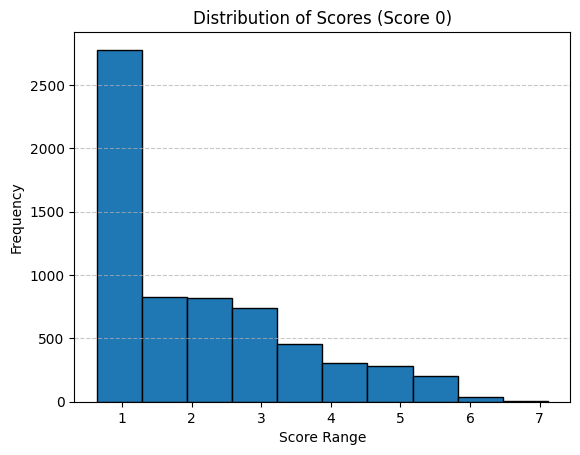

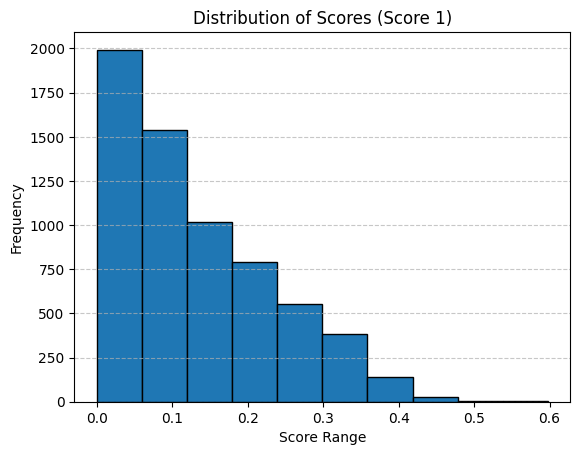

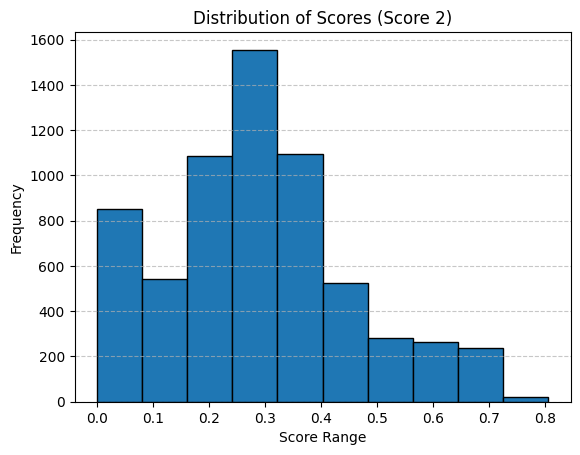

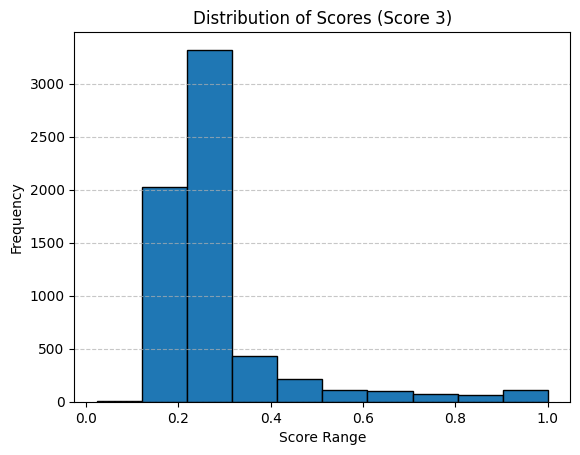

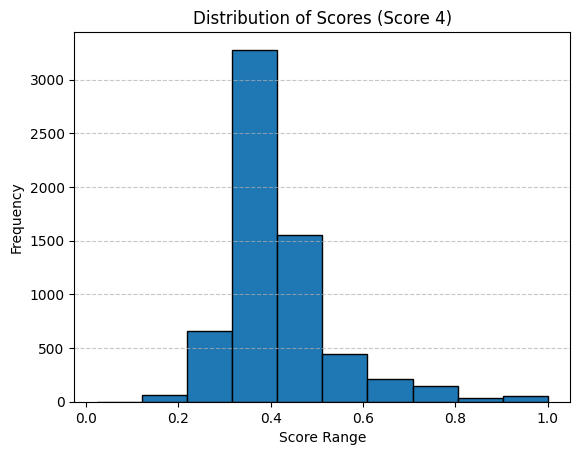

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the generated output dataset
output_filepath = 'Data/padded_entire_final_dataset.csv'
output_df = pd.read_csv(output_filepath)

# Plotting the distribution of scores using a bar chart
plt.hist(output_df['Score_0'], bins=10, edgecolor='black')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.title('Distribution of Scores (Score 0)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the distribution of scores using a bar chart
plt.hist(output_df['Score_1'], bins=10, edgecolor='black')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.title('Distribution of Scores (Score 1)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.hist(output_df['Score_2'], bins=10, edgecolor='black')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.title('Distribution of Scores (Score 2)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.hist(output_df['Score_3'], bins=10, edgecolor='black')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.title('Distribution of Scores (Score 3)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.hist(output_df['Score_4'], bins=10, edgecolor='black')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.title('Distribution of Scores (Score 4)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
